In [8]:
import sys
import os

# Add the project root directory to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [20]:
from riskformer.utils.config_utils import load_preprocessing_config
from riskformer.data.datasets import create_riskformer_dataset

/Users/landeros/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /Library/Application Support/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /Users/landeros/Library/Application Support/sagemaker/config.yaml


In [ ]:
dataset_metadata = os.path.join(project_root, "resources/riskformer_slide_samples.json")
preprocessing_config_path = os.path.join(project_root, "configs/preprocessing/ec2_config.yaml")
preprocessing_config = load_preprocessing_config(preprocessing_config_path)

dataset = create_riskformer_dataset(
    s3_bucket=preprocessing_config["s3"]["data_bucket"],
    s3_prefix=os.path.join(preprocessing_config["s3"]["output_dir"], preprocessing_config["model"]["key"]),
    metadata_file=dataset_metadata,
)

# TODO




[03/05/25 02:44:20] INFO     Loading cached SSO token for mgb                                         ]8;id=201202;file:///Users/landeros/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/botocore/tokens.py\tokens.py]8;;\:]8;id=241531;file:///Users/landeros/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/botocore/tokens.py#305\305]8;;\

[03/05/25 02:44:21] INFO     {"event":"load_metadata","status":"success","timestamp":"2025-03- ]8;id=171062;file:///Users/landeros/Desktop/BRCA/brca_riskformer/riskformer/utils/logger_config.py\logger_config.py]8;;\:]8;id=597651;file:///Users/landeros/Desktop/BRCA/brca_riskformer/riskformer/utils/logger_config.py#175\175]8;;\
                             05T07:44:21.551070","total_slides":1099}                                              

                    INFO     {"event":"find_complete_slide_sets","status":"success","timestamp ]8;id=700932;file:///Users/landeros/Desktop/BRCA/brca_riskformer/riskformer/utils/logger_config.py\logger_config.py]8;;\:]8;id=776992;file:///Users/landeros/Desktop/BRCA/brca_riskformer/riskformer/utils/logger_config.py#175\175]8;;\
                             ":"2025-03-05T07:44:21.802466","total_files":144,"total_slides_in                     
                             _metadata":1099,"preprocessed_slides_found":36,"missing_slides":1                     
                             063}                                                                                  

                    INFO     Loading cached SSO token for mgb                                         ]8;id=923409;file:///Users/landeros/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/botocore/tokens.py\tokens.py]8;;\:]8;id=784229;file:///Users/landeros/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/botocore/tokens.py#305\305]8;;\

[03/05/25 02:44:35] INFO     {"event":"create_riskformer_dataset","status":"success","timestam ]8;id=958670;file:///Users/landeros/Desktop/BRCA/brca_riskformer/riskformer/utils/logger_config.py\logger_config.py]8;;\:]8;id=146130;file:///Users/landeros/Desktop/BRCA/brca_riskformer/riskformer/utils/logger_config.py#175\175]8;;\
                             p":"2025-03-05T07:44:35.394415","slide_count":36,"feature_dim":15                     
                             36,"cache_dir":"/var/folders/mj/wnc76vx92mg99q7wh39m021c0000gn/T/                     
                             riskformer_cache"}                                                                    

In [28]:
# Get the data tensor
data = dataset[1]
# Convert sparse tensor to dense tensor
data = data.to_dense()


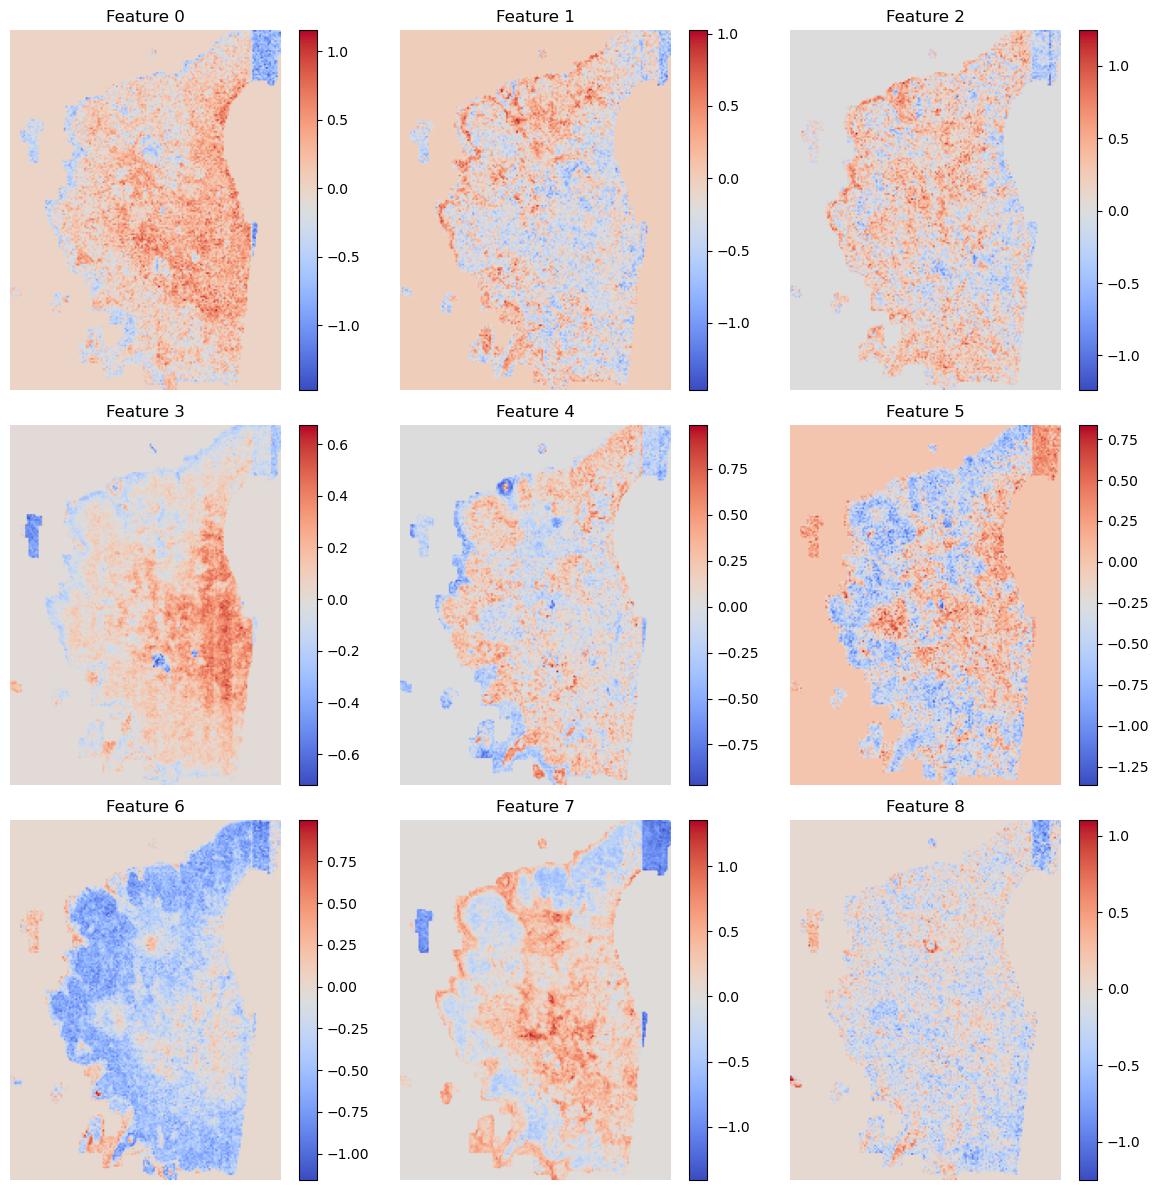

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()

# Plot 9 different feature channels
for i in range(9):
    feature_map = data[:, :, i]  # Get ith feature channel
    im = axes[i].imshow(feature_map, cmap='coolwarm')
    axes[i].set_title(f'Feature {i}')
    axes[i].axis('off')
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()